# Import Libraries

In [41]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import os
import json

# Load Data

In [19]:
street_data = gpd.read_file(r"data\geo_data\detailnetz_straßenabschnitte\Detailnetz-Strassenabschnitte.shp")
bezirksgrenzen_data = gpd.read_file(r"data\geo_data\bezirksgrenzen\bezirksgrenzen.shp")

In [20]:
def make_columns_lower(df):
    ### MAKE COLUMNS LOWERCASE ###
    df.columns = [col.lower() for col in df.columns]
    return df

In [21]:
bezirksgrenzen_data = make_columns_lower(bezirksgrenzen_data)
bezirksgrenzen_data_cut = bezirksgrenzen_data[["gemeinde_n", "schluessel", "geometry"]]
bezirksgrenzen_data_cut["schluessel"] = [key[-3:] for key in bezirksgrenzen_data_cut["schluessel"]]

C:\Users\p.kollhof\Anaconda3\envs\DA\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
def data_2018():
    data18 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2018_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    return data18

data18 = data_2018()

def data_2019():
    data19 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2019_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    return data19

data19 = data_2019()

def data_2020():
    data20 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2020_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    return data20

data20 = data_2020()

def data_2021():
    data21 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2021_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    return data21

data21 = data_2021()

def data_all_18_21():
    data18 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2018_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    data19 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2019_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    data20 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2020_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    data21 = pd.read_csv(r"data\\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2021_Datensatz.csv", sep=";", encoding = "ISO-8859-1")
    data_all = pd.concat([data18, data19, data20, data21], axis=0)
    return data_all

data_all = data_all_18_21()

# Plotting Trys

In [22]:
bezirksgrenzen_data_cut["area"] = bezirksgrenzen_data_cut.area
bezirksgrenzen_data_cut["boundary"] = bezirksgrenzen_data_cut.boundary
bezirksgrenzen_data_cut["centroid"] = bezirksgrenzen_data_cut.centroid

C:\Users\p.kollhof\AppData\Local\Temp\ipykernel_8876\491818559.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bezirksgrenzen_data_cut["area"] = bezirksgrenzen_data_cut.area
C:\Users\p.kollhof\Anaconda3\envs\DA\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\p.kollhof\Anaconda3\envs\DA\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [23]:
bezirksgrenzen_data_cut

gemeinde_n schluessel  \
0                Reinickendorf        012   
1   Charlottenburg-Wilmersdorf        004   
2             Treptow-Köpenick        009   
3                       Pankow        003   
4                     Neukölln        008   
5                  Lichtenberg        011   
6          Marzahn-Hellersdorf        010   
7                      Spandau        005   
8          Steglitz-Zehlendorf        006   
9                        Mitte        001   
10    Friedrichshain-Kreuzberg        002   
11        Tempelhof-Schöneberg        007   

                                             geometry      area  \
0   POLYGON ((13.32074 52.62660, 13.32104 52.62658...  0.011846   
1   POLYGON ((13.32111 52.52446, 13.32137 52.52452...  0.008561   
2   POLYGON ((13.57925 52.39083, 13.57894 52.39078...  0.022161   
3   MULTIPOLYGON (((13.50481 52.61960, 13.50484 52...  0.013689   
4   POLYGON ((13.45832 52.48569, 13.45856 52.48552...  0.005938   
5   POLYGON ((13.52316 52.47424, 13.52289 52.47444...  0.006902   
6   POLYGON ((13.61317 52.47213, 13.61298 52.47197...  0.008184   
7   POLYGON ((13.23119 52.56124, 13.23135 52.56112...  0.012165   
8   POLYGON ((13.31952 52.46699, 13.31984 52.46698...  0.013552   
9   POLYGON ((13.37721 52.56091, 13.37727 52.56114...  0.005218   
10  POLYGON ((13.45529 52.52127, 13.45621 52.52110...  0.002700   
11  POLYGON ((13.38759 52.38677, 13.38755 52.38701...  0.007011   

                                             boundary  \
0   LINESTRING (13.32074 52.62660, 13.32104 52.626...   
1   LINESTRING (13.32111 52.52446, 13.32137 52.524...   
2   LINESTRING (13.57925 52.39083, 13.57894 52.390...   
3   MULTILINESTRING ((13.50481 52.61960, 13.50484 ...   
4   LINESTRING (13.45832 52.48569, 13.45856 52.485...   
5   LINESTRING (13.52316 52.47424, 13.52289 52.474...   
6   LINESTRING (13.61317 52.47213, 13.61298 52.471...   
7   LINESTRING (13.23119 52.56124, 13.23135 52.561...   
8   LINESTRING (13.31952 52.46699, 13.31984 52.466...   
9   LINESTRING (13.37721 52.56091, 13.37727 52.561...   
10  LINESTRING (13.45529 52.52127, 13.45621 52.521...   
11  LINESTRING (13.38759 52.38677, 13.38755 52.387...   

                     centroid  
0   POINT (13.29134 52.59568)  
1   POINT (13.27023 52.50104)  
2   POINT (13.61122 52.42959)  
3   POINT (13.44025 52.59719)  
4   POINT (13.45497 52.44108)  
5   POINT (13.50976 52.53491)  
6   POINT (13.57883 52.52112)  
7   POINT (13.17882 52.52580)  
8   POINT (13.23908 52.43484)  
9   POINT (13.36590 52.53288)  
10  POINT (13.42824 52.50382)  
11  POINT (13.38073 52.44112)

In [38]:
#fig, ax = plt.subplots(figsize=(10,10))
#bezirksgrenzen_data_cut.plot("area", ax = ax, legend=True)
bezirksgrenzen_data_cut.explore("area", legend=True)
#plt.show()

<AxesSubplot: >

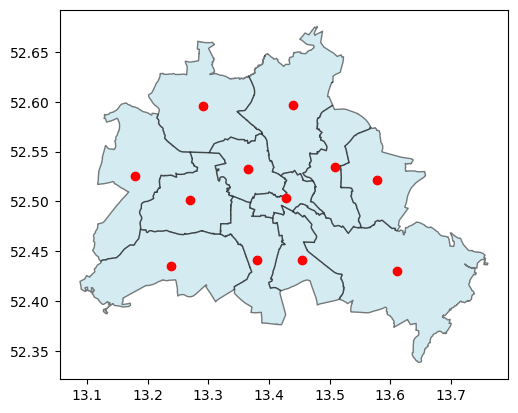

In [40]:
ax = bezirksgrenzen_data_cut["geometry"].plot(alpha=0.5, color="lightblue", edgecolor="black")
bezirksgrenzen_data_cut["centroid"].plot(ax=ax, color="r")

In [42]:
bezirksgrenzen_data_cut.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

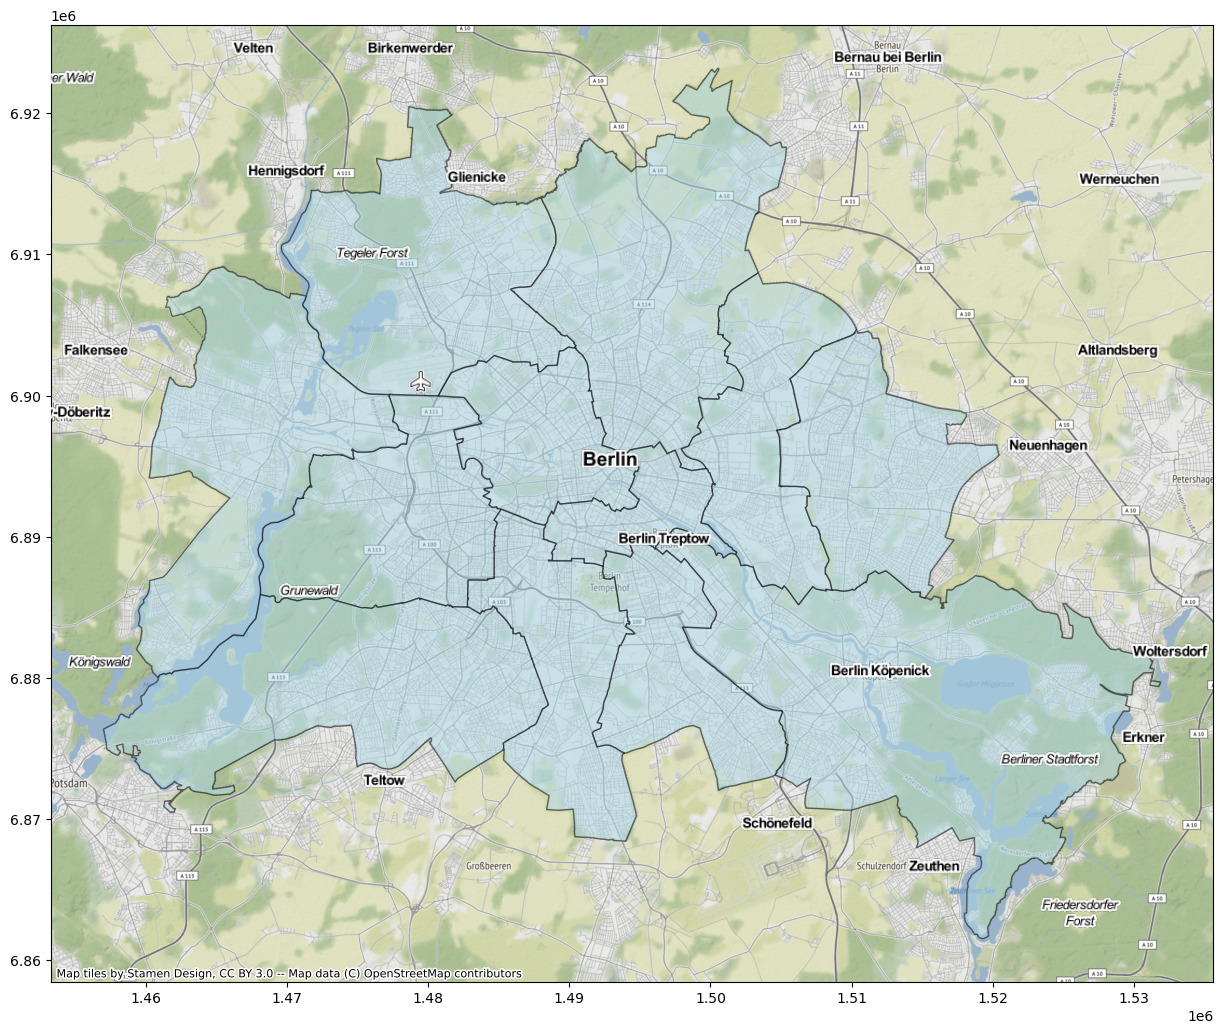

In [54]:
# CONVERT CRS OF DF (=4326) TO EPSG-STANDARD OF 3857
# seems to be distortion-free
bezirksgrenzen_data_cut_wm = bezirksgrenzen_data_cut.to_crs(epsg=3857)
ax = bezirksgrenzen_data_cut_wm["geometry"].plot(alpha=0.5, color="lightblue", edgecolor="black", figsize=(15,15))
cx.add_basemap(ax, zoom=12)
# Have labels move to foreground (not be obscured by plotted color areas)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)

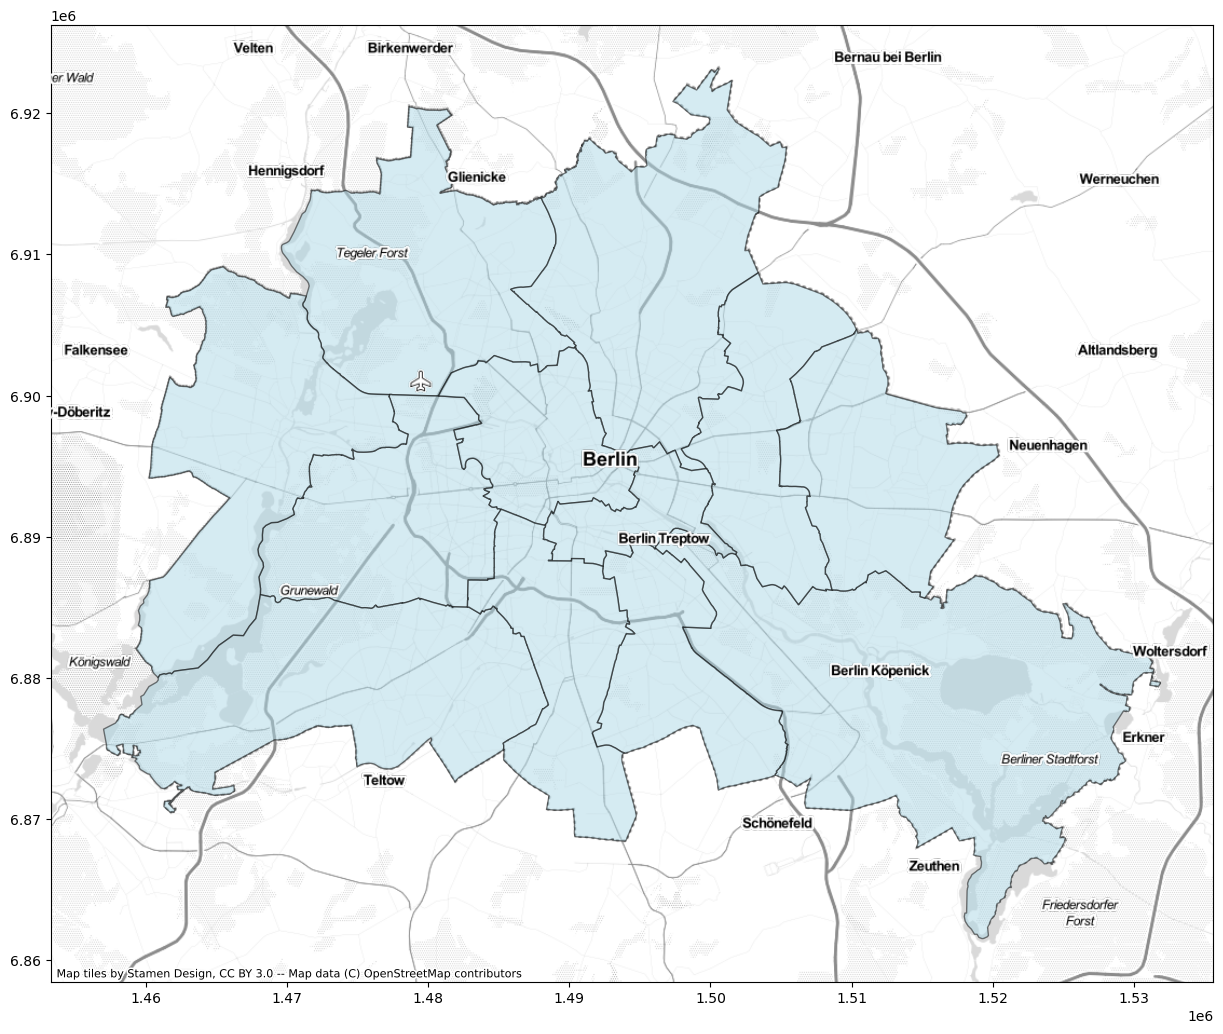

In [53]:
ax = bezirksgrenzen_data_cut_wm["geometry"].plot(alpha=0.5, color="lightblue", edgecolor="black", figsize=(15,15))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
# Have labels move to foreground (not be obscured by plotted color areas)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)

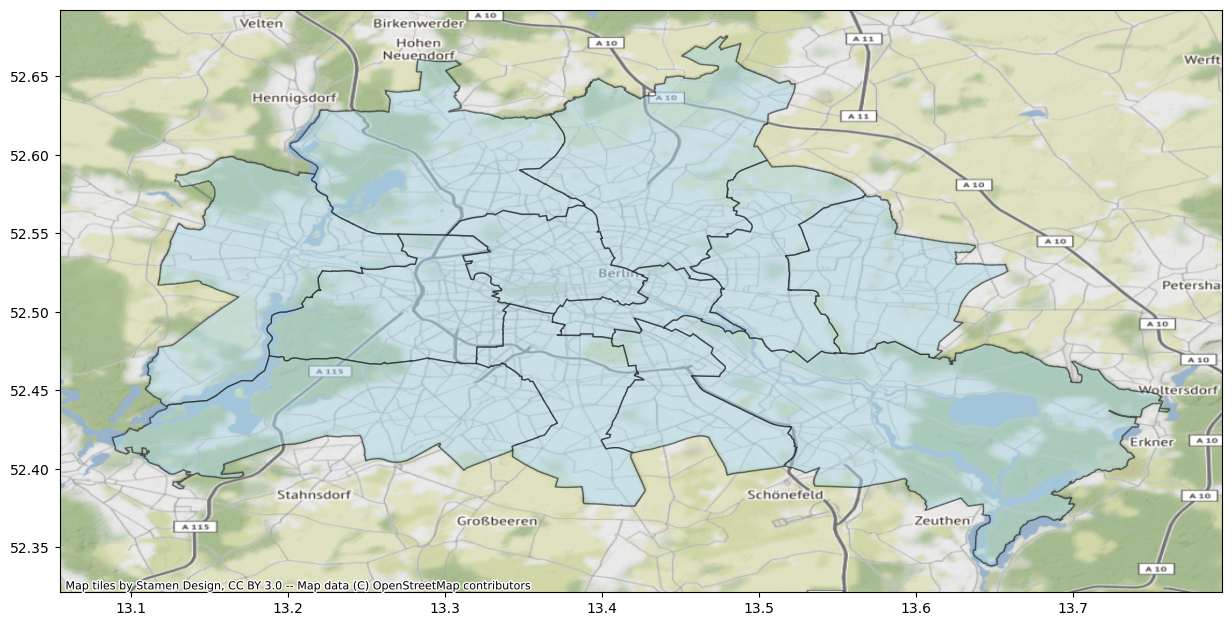

In [49]:
# CONVERT CRS OF BACKGROUND MAP TO THAT OF DF
# is distorted
ax = bezirksgrenzen_data_cut["geometry"].plot(alpha=0.5, color="lightblue", edgecolor="black", figsize=(15,15))
cx.add_basemap(ax, crs=bezirksgrenzen_data_cut.crs)

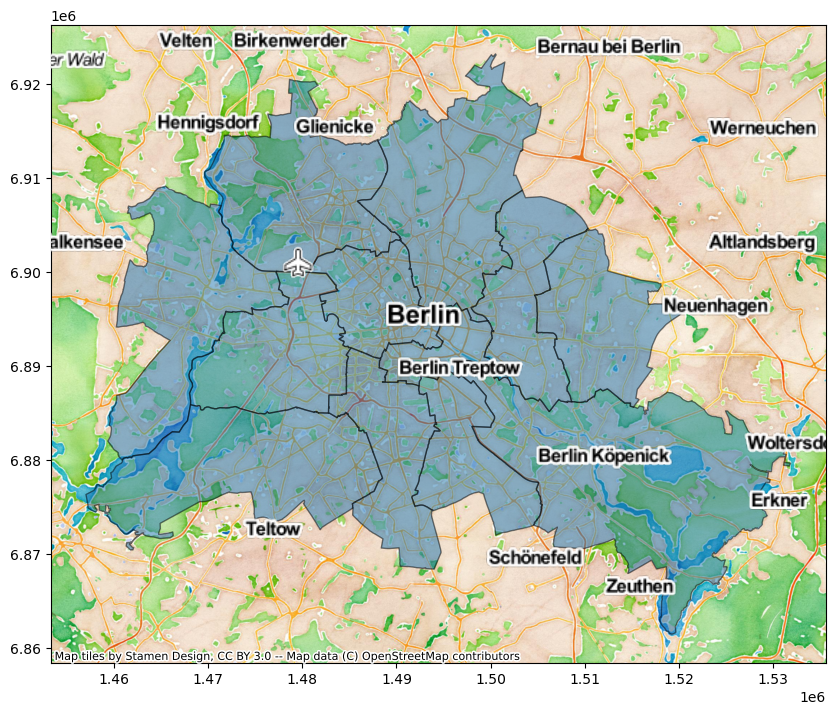

In [55]:
ax = bezirksgrenzen_data_cut_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=10)